# Feature selection with Genetic Algorithms

## 1. Load data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sig = pd.read_hdf('higgs_signal.h5')
bkg = pd.read_hdf('higgs_bkg.h5')

In [4]:
sig.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,jet2_pt,...,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,label
0,0.723801,-0.914611,0.910944,1.194830,-0.448292,0.839489,-0.871428,0.587799,0.000000,0.654446,...,-0.916982,3.101961,0.867059,1.127180,1.211664,0.695883,0.694068,0.755813,0.761658,0
1,1.974119,0.660297,-1.362428,1.234102,1.677716,1.478815,0.408940,-0.105273,0.000000,1.017048,...,1.604089,3.101961,1.938668,1.233898,0.990063,0.524871,0.900614,0.917613,1.083369,0
2,0.946889,0.169416,1.210014,0.343294,-1.579545,0.999435,1.030804,-0.475041,0.000000,0.435374,...,0.558635,3.101961,0.881641,0.845381,0.997408,0.695120,0.787132,0.657668,0.721147,0
3,1.298084,-0.897079,1.224441,0.618091,0.856746,0.493122,-0.021810,-1.520042,2.173076,0.973234,...,0.581386,0.000000,0.848238,0.925814,0.973957,0.961469,0.946147,1.028120,0.848133,0
4,1.022289,-0.481195,0.169649,1.103255,0.744424,1.648197,-0.780327,-1.484007,2.173076,0.675472,...,-0.284934,1.550981,0.717778,0.752909,0.996800,1.648921,1.138676,1.118826,0.977200,0


/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/cvmfs/sft.cern.ch/lcg

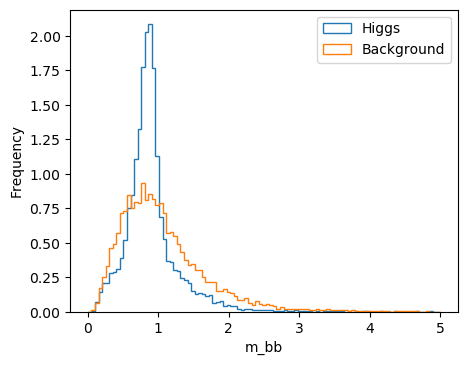

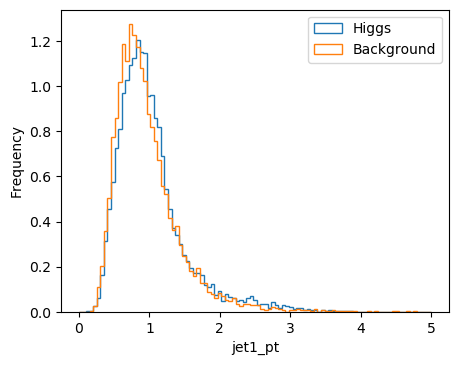

In [14]:
VAR1 = 'm_bb'
VAR2 = 'jet1_pt'
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VAR1)
bins = np.linspace(0, 5, 100)
sig[VAR1].plot.hist(bins, alpha=1, label='Higgs',histtype='step', normed=True)
bkg[VAR1].plot.hist(bins, alpha=1, label='Background',histtype='step', normed=True)
plt.legend(loc='upper right')
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VAR2)
bins = np.linspace(0, 5, 100)
sig[VAR2].plot.hist(bins, alpha=1, label='Higgs',histtype='step', normed=True)
bkg[VAR2].plot.hist(bins, alpha=1, label='Background',histtype='step', normed=True)
plt.legend(loc='upper right')

In [15]:
data = pd.concat([sig, bkg])

In [16]:
features = data.drop(['label'], axis=1).values
labels = data[['label']].values.ravel()

## 2. Run the tutorial GA

In [10]:
num_samples = features.shape[0]
num_feature_elements = features.shape[1]

In [7]:
sol_per_pop = 12 # Population size.
num_parents_mating = 6 # Number of parents inside the mating pool.
num_mutations = 3 # Number of elements to mutate.

# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)

In [8]:
sol_per_pop = 12 # Population size.
num_parents_mating = 6 # Number of parents inside the mating pool.
num_mutations = 3 # Number of elements to mutate.
num_generations = 100

# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)
# Creating the initial population.
new_population = np.random.randint(low=0, high=2, size=pop_shape)
print(new_population.shape)

best_outputs = []
num_generations = 100

(12, 28)


In [32]:
import ga

In [10]:
import importlib
importlib.reload(ga)

<module 'ga' from '/eos/home-l/llayer/Higgs/ga.py'>

In [11]:
for generation in range(num_generations):
    print("Generation : ", generation)
    
    # Measuring the fitness of each chromosome in the population.
    fitness = ga.cal_pop_fitness(new_population, features, labels)
    
    best_outputs.append(np.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", best_outputs[-1])

    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents, offspring_size=(pop_shape[0]-parents.shape[0], num_feature_elements))

    # Adding some variations to the offspring using mutation.
    offspring_mutation = ga.mutation(offspring_crossover, num_mutations=num_mutations)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

Generation :  0
0.7649215609763802
0.7243597508310788
0.7077711419219794
0.7361910134657782
0.7532368202172455
0.6846897910114087
0.6340605826400367
0.6978888360432611
0.6994038749916316
0.6489120509673887
0.7299963201933226
0.712091218431102
[0.76492156 0.72435975 0.70777114 0.73619101 0.75323682 0.68468979
 0.63406058 0.69788884 0.69940387 0.64891205 0.72999632 0.71209122]
Best result :  0.7649215609763802
Generation :  1
0.7649215609763802
0.7532368202172455
0.7361910134657782
0.7299963201933226
0.7243597508310788
0.712091218431102
0.7604326468187305
0.730922654357421
0.7470339995953774
0.7099249813507177
0.7266813258948648
0.7515285156548821
[0.76492156 0.75323682 0.73619101 0.72999632 0.72435975 0.71209122
 0.76043265 0.73092265 0.747034   0.70992498 0.72668133 0.75152852]
Best result :  0.7649215609763802
Generation :  2
0.7649215609763802
0.7604326468187305
0.7532368202172455
0.7515285156548821
0.7470339995953774
0.7361910134657782
0.7619016307870975
0.7622812744308354
0.7571398

0.7814711861586372
0.781323240848995
0.7810945271347401
0.781031345028574
0.78063411508639
0.7804979245871972
0.7728484357699248
0.7739565103237082
0.7715385549976815
0.7721805237668034
0.7719798195618228
0.7725531420746083
[0.78147119 0.78132324 0.78109453 0.78103135 0.78063412 0.78049792
 0.77284844 0.77395651 0.77153855 0.77218052 0.77197982 0.77255314]
Best result :  0.7814711861586372
Generation :  21
0.7814711861586372
0.781323240848995
0.7810945271347401
0.781031345028574
0.78063411508639
0.7804979245871972
0.7783290243075706
0.7787442078860268
0.7779445134376308
0.7791363410158674
0.7778335774140134
0.7782067926457865
[0.78147119 0.78132324 0.78109453 0.78103135 0.78063412 0.78049792
 0.77832902 0.77874421 0.77794451 0.77913634 0.77783358 0.77820679]
Best result :  0.7814711861586372
Generation :  22
0.7814711861586372
0.781323240848995
0.7810945271347401
0.781031345028574
0.78063411508639
0.7804979245871972
0.7722768581118157
0.7735154294284803
0.7709795127429033
0.77157469185

0.7819253075467076
0.7818933032385696
0.7815333121685522
0.7814711861586372
0.781323240848995
0.7810945271347401
0.7716566541089169
0.7726825827412382
0.7718000995301841
0.7719263719080602
0.7717272288888426
0.7734594104099315
[0.78192531 0.7818933  0.78153331 0.78147119 0.78132324 0.78109453
 0.77165665 0.77268258 0.7718001  0.77192637 0.77172723 0.77345941]
Best result :  0.7819253075467076
Generation :  41
0.7819253075467076
0.7818933032385696
0.7815333121685522
0.7814711861586372
0.781323240848995
0.7810945271347401
0.7754085049175974
0.7760490961698694
0.7762222041206304
0.7750617380093358
0.775823137489314
0.7766043732119258
[0.78192531 0.7818933  0.78153331 0.78147119 0.78132324 0.78109453
 0.7754085  0.7760491  0.7762222  0.77506174 0.77582314 0.77660437]
Best result :  0.7819253075467076
Generation :  42
0.7819253075467076
0.7818933032385696
0.7815333121685522
0.7814711861586372
0.781323240848995
0.7810945271347401
0.77845984249105
0.7792968676460689
0.7780211033744662
0.77827

0.7822324019697021
0.7819253075467076
0.7818933032385696
0.7818724568169131
0.7818597836618972
0.7817744694516813
0.7722783274631217
0.7734121156647634
0.7729703460111106
0.7719861102221026
0.7711722732673846
0.7727643613248736
[0.7822324  0.78192531 0.7818933  0.78187246 0.78185978 0.78177447
 0.77227833 0.77341212 0.77297035 0.77198611 0.77117227 0.77276436]
Best result :  0.7822324019697021
Generation :  61
0.7822324019697021
0.7819253075467076
0.7818933032385696
0.7818724568169131
0.7818597836618972
0.7817744694516813
0.7499529118823594
0.7504364202965537
0.7487590180288488
0.7493821148171316
0.7498214967749116
0.7497202952036975
[0.7822324  0.78192531 0.7818933  0.78187246 0.78185978 0.78177447
 0.74995291 0.75043642 0.74875902 0.74938211 0.7498215  0.7497203 ]
Best result :  0.7822324019697021
Generation :  62
0.7822324019697021
0.7819253075467076
0.7818933032385696
0.7818724568169131
0.7818597836618972
0.7817744694516813
0.7714430012455507
0.7719044693901522
0.7700409186788437
0

0.7822324019697021
0.7819253075467076
0.7818933032385696
0.7818724568169131
0.7818597836618972
0.7817744694516813
0.7302534566719066
0.7334530609755998
0.7285821154783396
0.7305022362149363
0.7285019899149237
0.7322068214818059
[0.7822324  0.78192531 0.7818933  0.78187246 0.78185978 0.78177447
 0.73025346 0.73345306 0.72858212 0.73050224 0.72850199 0.73220682]
Best result :  0.7822324019697021
Generation :  81
0.7822324019697021
0.7819253075467076
0.7818933032385696
0.7818724568169131
0.7818597836618972
0.7817744694516813
0.760085053400359
0.7596902111540478
0.759089154635358
0.7602259274568404
0.7607908930340719
0.7602154583287839
[0.7822324  0.78192531 0.7818933  0.78187246 0.78185978 0.78177447
 0.76008505 0.75969021 0.75908915 0.76022593 0.76079089 0.76021546]
Best result :  0.7822324019697021
Generation :  82
0.7822324019697021
0.7819253075467076
0.7818933032385696
0.7818724568169131
0.7818597836618972
0.7817744694516813
0.7803522751389708
0.7803478211678239
0.7808788998305563
0.7

In [12]:
from matplotlib import pyplot as plt

0.7822324019697021
0.7819253075467076
0.7818933032385696
0.7818724568169131
0.7818649263914688
0.7818597836618972
0.7717151526577948
0.7714571437518729
0.7712103386496606
0.7722144565985307
0.7714556284833383
0.7720901127442441
best_match_idx :  0
best_solution :  [1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Selected indices :  [ 0  2  3  4  5  8  9 12 13 14 15 16 18 19 20 21 22 23 24 25 26 27]
Number of selected elements :  22
Best solution fitness :  0.7822324019697021


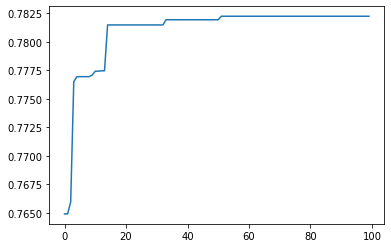

In [13]:

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(new_population, features, labels)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))[0]
best_match_idx = best_match_idx[0]

best_solution = new_population[best_match_idx, :]
best_solution_indices = np.where(best_solution == 1)[0]
best_solution_num_elements = best_solution_indices.shape[0]
best_solution_fitness = fitness[best_match_idx]

print("best_match_idx : ", best_match_idx)
print("best_solution : ", best_solution)
print("Selected indices : ", best_solution_indices)
print("Number of selected elements : ", best_solution_num_elements)
print("Best solution fitness : ", best_solution_fitness)

plt.plot(best_outputs)

In [26]:
import numpy
import sklearn.svm
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)


SV_classifier = sklearn.svm.SVC(gamma='scale')
SV_classifier.fit(X=X_train, y=y_train)

predictions = SV_classifier.decision_function(X_test)#.predict(X_test)
score_all = roc_auc_score(y_test, predictions) # classification_accuracy(y_test, predictions)
print(score_all)


0.6933416988401032


In [14]:
fitness = pd.DataFrame(best_outputs)

In [15]:
fitness.to_hdf('xgb_sol_12_parents_6_mutations_3.h5', 'frame')

### Plot the results

In [18]:
df1 = pd.read_hdf('sol_16_parents_8_mutations_6.h5')
df2 = pd.read_hdf('sol_8_parents_4_mutations_3.h5')
df3 = pd.read_hdf('sol_8_parents_4_mutations_6.h5')

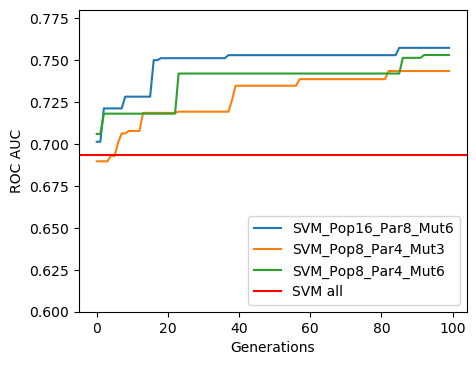

In [32]:
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel('Generations')
plt.ylabel('ROC AUC')
plt.ylim(0.6, 0.78)
plt.plot(df1, label = 'SVM_Pop16_Par8_Mut6')
plt.plot(df2, label = 'SVM_Pop8_Par4_Mut3')
plt.plot(df3, label = 'SVM_Pop8_Par4_Mut6')
plt.axhline(y=score_all, color='r', linestyle='-', label='SVM all')
plt.legend(loc='lower right')

## 4. GA with DEAP

In [33]:
from deap import base, creator
import random
import numpy as np
import pandas as pd
from deap import tools, algorithms

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

class FitenessFunction:
    
    def __init__(self, test_size = 0.33,*args,**kwargs):
        """
            Parameters
            -----------
            n_splits :int, 
                Number of splits for cv
            
            verbose: 0 or 1
        """
        self.test_size = test_size
    

    def calculate_fitness(self,model,X,y):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        model.fit(X=X_train, y=y_train)
        predictions = model.predict_proba(X_test)[:,1] 
        score = roc_auc_score(y_test, predictions) 
        #print( score )
        return score



In [35]:
class FeatureSelectionGA:
    """
        FeaturesSelectionGA
        This class uses Genetic Algorithm to find out the best features for an input model
        using Distributed Evolutionary Algorithms in Python(DEAP) package. Default toolbox is
        used for GA but it can be changed accordingly.
    
    """
    def __init__(self,model,x,y,test_size=.33,verbose=0):
        """
            Parameters
            -----------
            model : scikit-learn supported model, 
                x :  {array-like}, shape = [n_samples, n_features]
                     Training vectors, where n_samples is the number of samples 
                     and n_features is the number of features.
 
                y  : {array-like}, shape = [n_samples]
                     Target Values
            cv_split: int
                     Number of splits for cross_validation to calculate fitness.
            
            verbose: 0 or 1
        """
        self.model =  model
        self.n_features = x.shape[1]
        self.toolbox = None
        self.creator = self._create()
        self.test_size = test_size
        self.x = x
        self.y = y
        self.verbose = verbose
        if self.verbose==1:
            print("Model {} will select best features among {} features using cv_split :{}.".format(model,x.shape[1],cv_split))
            print("Shape od train_x: {} and target: {}".format(x.shape,y.shape))
        self.final_fitness = []
        self.fitness_in_generation = {}
        self.best_ind = None
    
    def evaluate(self,individual):
        fit_obj = FitenessFunction(self.test_size)
        np_ind = np.asarray(individual)
        if np.sum(np_ind) == 0:
            fitness = 0.0
        else:
            feature_idx = np.where(np_ind==1)[0]
            fitness = fit_obj.calculate_fitness(self.model,self.x[:,feature_idx],self.y)
        
        if self.verbose == 1:
            print("Individual: {}  Fitness_score: {} ".format(individual,fitness))
            
        return fitness,
    
    
    def _create(self):
        creator.create("FeatureSelect", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FeatureSelect)
        return creator
    
    def create_toolbox(self):
        """ 
            Custom creation of toolbox.
            Parameters
            -----------
                self
            Returns
            --------
                Initialized toolbox
        """
        
        self._init_toolbox()
        return toolbox
        
    def register_toolbox(self,toolbox):
        """ 
            Register custom created toolbox. Evalute function will be registerd
            in this method.
            Parameters
            -----------
                Registered toolbox with crossover,mutate,select tools except evaluate
            Returns
            --------
                self
        """
        toolbox.register("evaluate", self.evaluate)
        self.toolbox = toolbox
     
    
    def _init_toolbox(self):
        toolbox = base.Toolbox()
        toolbox.register("attr_bool", random.randint, 0, 1)
        # Structure initializers
        toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, self.n_features)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        return toolbox
        
        
    def _default_toolbox(self):
        toolbox = self._init_toolbox()
        toolbox.register("mate", tools.cxTwoPoint) #tools.cxOnePoint
        toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
        toolbox.register("select", tools.selTournament, tournsize=3) #tools.selBest) 
        toolbox.register("evaluate", self.evaluate)
        return toolbox
    
    def get_final_scores(self,pop,fits):
        self.final_fitness = list(zip(pop,fits))
        
    
        
    def generate(self,n_pop,cxpb = 0.5,mutxpb = 0.2,ngen=5,set_toolbox = False):
        
        """ 
            Generate evolved population
            Parameters
            -----------
                n_pop : {int}
                        population size
                cxpb  : {float}
                        crossover probablity
                mutxpb: {float}
                        mutation probablity
                n_gen : {int}
                        number of generations
                set_toolbox : {boolean}
                              If True then you have to create custom toolbox before calling 
                              method. If False use default toolbox.
            Returns
            --------
                Fittest population
        """
        
        
        
        if self.verbose==1:
            print("Population: {}, crossover_probablity: {}, mutation_probablity: {}, total generations: {}".format(n_pop,cxpb,mutxpb,ngen))
        
        if not set_toolbox:
            self.toolbox = self._default_toolbox()
        else:
            raise Exception("Please create a toolbox.Use create_toolbox to create and register_toolbox to register. Else set set_toolbox = False to use defualt toolbox")
        pop = self.toolbox.population(n_pop)
        CXPB, MUTPB, NGEN = cxpb,mutxpb,ngen

        # Evaluate the entire population
        print("EVOLVING.......")
        fitnesses = list(map(self.toolbox.evaluate, pop))
        
        for ind, fit in zip(pop, fitnesses):
            ind.fitness.values = fit

        for g in range(NGEN):
            print("-- GENERATION {} --".format(g+1))
            offspring = self.toolbox.select(pop, len(pop))
            self.fitness_in_generation[str(g+1)] = max([ind.fitness.values[0] for ind in pop])
            # Clone the selected individuals
            offspring = list(map(self.toolbox.clone, offspring))            
            
            # Apply crossover and mutation on the offspring
            for child1, child2 in zip(offspring[::2], offspring[1::2]):
                                
                if random.random() < CXPB:
                    self.toolbox.mate(child1, child2)
                    del child1.fitness.values
                    del child2.fitness.values
                    

            for mutant in offspring:
                if random.random() < MUTPB:
                    self.toolbox.mutate(mutant)
                    del mutant.fitness.values
            
            # Evaluate the individuals with an invalid fitness
            weak_ind = [ind for ind in offspring if not ind.fitness.valid]
            fitnesses = list(map(self.toolbox.evaluate, weak_ind))
            for ind, fit in zip(weak_ind, fitnesses):
                ind.fitness.values = fit
            print("Evaluated %i individuals" % len(weak_ind))

            # The population is entirely replaced by the offspring
            pop[:] = offspring
            
                    # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        if self.verbose==1:
            print("  Min %s" % min(fits))
            print("  Max %s" % max(fits))
            print("  Avg %s" % mean)
            print("  Std %s" % std)
    
        print("-- Only the fittest survives --")

        self.best_ind = tools.selBest(pop, 1)[0]
        print("Best individual is %s, %s" % (self.best_ind, self.best_ind.fitness.values))
        self.get_final_scores(pop,fits)
        
        return pop
    
    
    def auto(self,n_pop,cxpb = 0.5,mutxpb = 0.2,ngen=5, set_toolbox = False):
        
        if self.verbose==1:
            print("Population: {}, crossover_probablity: {}, mutation_probablity: {}, total generations: {}".format(n_pop,cxpb,mutxpb,ngen))
        
        if not set_toolbox:
            self.toolbox = self._default_toolbox()
        else:
            raise Exception("Please create a toolbox.Use create_toolbox to create and register_toolbox to register. Else set set_toolbox = False to use defualt toolbox")
        
        pop = self.toolbox.population(n_pop)        
        hof = tools.HallOfFame(1)
        
        s = tools.Statistics(key=lambda ind: ind.fitness.values)
        s.register("mean", np.mean)
        s.register("max", max)

        mu = n_pop
        lambda_ = int(n_pop/2)
        log = algorithms.eaMuPlusLambda(pop, self.toolbox, mu, lambda_, cxpb, mutxpb, 
                                        ngen, stats=s, halloffame=hof, verbose=False)
        
        
        log = algorithms.eaSimple(pop, self.toolbox, cxpb, mutxpb, 
                                  ngen, stats = s, halloffame=hof, verbose=False)
        
        return log, hof

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, n_jobs=4, random_state=42)

In [40]:
fit_obj = FitenessFunction()
score_all = fit_obj.calculate_fitness(model,features,labels)

In [39]:
fsga = FeatureSelectionGA(model, features, labels)
#pop = fsga.generate(12, cxpb = 0.5, mutxpb = 0.5, ngen=100)
log, hof = fsga.auto(100, cxpb = 0.5, mutxpb = 0.5, ngen=50)

/eos/user/l/llayer/.local/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FeatureSelect' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/eos/user/l/llayer/.local/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
best_solution = hof[0]
best_solution_indices = np.where(np.array(best_solution) == 1)[0]
best_solution_num_elements = best_solution_indices

print("best_solution : ", best_solution)
print("Selected indices : ", best_solution_indices)
print("Number of selected elements : ", best_solution_num_elements.shape[0])

In [ ]:
stats = log[1]
gens = stats.select('gen')
fitness = stats.select('max')
result = pd.DataFrame(fitness)
frame.to_hdf('rf_simple_twopoint_cxpb0.5_mutxpb0.5_pop100_gen50.h5', 'frame')

### Plot results

In [52]:
df1 = pd.read_hdf('rf_mulambda_twopoint_cxpb0.5_mutxpb0.5_pop100_gen100.h5')
df2 = pd.read_hdf('rf_MuLambda_twopoint_cxpb0.5_mutxpb0.5_pop12_gen100.h5')
df3 = pd.read_hdf('rf_simple_twopoint_cxpb0.5_mutxpb0.5_pop100_gen100.h5')
df4 = pd.read_hdf('rf_twopoint_cxpb0.5_mutxpb0.5_pop12_gen100.h5')

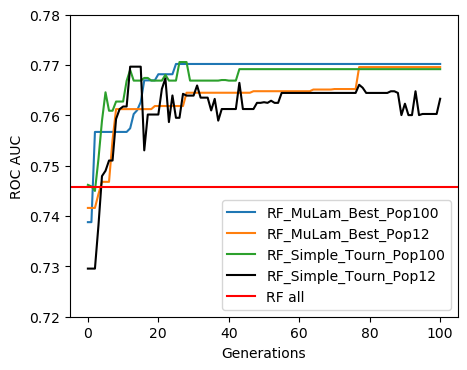

In [53]:
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel('Generations')
plt.ylabel('ROC AUC')
plt.ylim(0.72, 0.78)
plt.plot(df1, label = 'RF_MuLam_Best_Pop100')
plt.plot(df2, label = 'RF_MuLam_Best_Pop12')
plt.plot(df3, label = 'RF_Simple_Tourn_Pop100')
plt.plot(df4, label = 'RF_Simple_Tourn_Pop12', c='k')
plt.axhline(y=score_all, color='r', linestyle='-', label='RF all')
plt.legend(loc='lower right')